In [2]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
#import CSVf file
customerRepData = pd.read_csv('SampleDatabase_Warmup.csv')

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
customerRepData2 = customerRepData
customerRepData.head(10)

,Artist_Name,Album_Title,Genre,Composer,Total_Album_Sales,Total_Quantity_Sold,CustomerName,EmployeeName,Country,State,City,UnitPrice,InvoiceDate
0,AC/DC,For Those About To Rock We Salute You,Rock,"Angus Young, Malcolm Young, Brian Johnson",11.88,10.0,Lucas Mancini,Steve Johnson,Canada,AB,Calgary,0.99,2008-04-12 00:00:00
1,AC/DC,Let There Be Rock,Rock,AC/DC,8.91,6.0,Fernanda Ramos,Margaret Park,Canada,AB,Calgary,0.99,2010-11-01 00:00:00
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I",Classical,Aaron Copland,0.99,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
3,Aaron Goldberg,Worlds,Jazz,Aaron Goldberg,0.99,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,Classical,George Frideric Handel,0.99,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
5,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,Classical,Ralph Vaughan Williams,0.99,1.0,Luís Gonçalves,Jane Peacock,Canada,AB,Calgary,0.99,2010-10-27 00:00:00
6,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration,Classical,Wolfgang Amadeus Mozart,0.99,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
7,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others",Classical,Gabriel Fauré,0.99,1.0,Frank Ralston,Jane Peacock,Canada,AB,Calgary,0.99,2008-03-20 00:00:00
8,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4,Classical,Johann Sebastian Bach,1.98,2.0,Marc Dubois,Steve Johnson,Canada,AB,Calgary,0.99,2008-04-10 00:00:00
9,Accept,Balls to the Wall,Rock,NaN,1.98,2.0,Leonie Köhler,Steve Johnson,Canada,AB,Calgary,0.99,2007-01-01 00:00:00


In [6]:
customerRepData = customerRepData.fillna(value = {"Total_Quantity_Sold": 0})
customerRepData = customerRepData.dropna(subset=['EmployeeName'])
customerRepData = customerRepData.reset_index(drop=True)
customerRepData

,Artist_Name,Album_Title,Genre,Composer,Total_Album_Sales,Total_Quantity_Sold,CustomerName,EmployeeName,Country,State,City,UnitPrice,InvoiceDate
0,AC/DC,For Those About To Rock We Salute You,Rock,"Angus Young, Malcolm Young, Brian Johnson",11.88,10.0,Lucas Mancini,Steve Johnson,Canada,AB,Calgary,0.99,2008-04-12 00:00:00
1,AC/DC,Let There Be Rock,Rock,AC/DC,8.91,6.0,Fernanda Ramos,Margaret Park,Canada,AB,Calgary,0.99,2010-11-01 00:00:00
2,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites,Classical,Ralph Vaughan Williams,0.99,1.0,Luís Gonçalves,Jane Peacock,Canada,AB,Calgary,0.99,2010-10-27 00:00:00
3,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others",Classical,Gabriel Fauré,0.99,1.0,Frank Ralston,Jane Peacock,Canada,AB,Calgary,0.99,2008-03-20 00:00:00
4,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4,Classical,Johann Sebastian Bach,1.98,2.0,Marc Dubois,Steve Johnson,Canada,AB,Calgary,0.99,2008-04-10 00:00:00
5,Accept,Balls to the Wall,Rock,NaN,1.98,2.0,Leonie Köhler,Steve Johnson,Canada,AB,Calgary,0.99,2007-01-01 00:00:00
6,Accept,Restless and Wild,Rock,Deaffy & R.A. Smith-Diesel,0.99,1.0,Lucas Mancini,Steve Johnson,Canada,AB,Calgary,0.99,2008-04-12 00:00:00
7,Accept,Restless and Wild,Rock,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99,1.0,Leonie Köhler,Steve Johnson,Canada,AB,Calgary,0.99,2007-01-01 00:00:00
8,Accept,Restless and Wild,Rock,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99,1.0,Fernanda Ramos,Margaret Park,Canada,AB,Calgary,0.99,2010-11-01 00:00:00
9,Adrian Leaper & Doreen de Feis,Górecki: Symphony No. 3,Classical,Henryk Górecki,0.99,1.0,Patrick Gray,Margaret Park,Canada,AB,Calgary,0.99,2009-07-21 00:00:00


In [36]:
crd_Genre_Total_Quantity_Sold = customerRepData.groupby(['Genre','EmployeeName'])['Total_Quantity_Sold'].sum().reset_index()
crd_Genre_Total_Quantity_Sold

,Genre,EmployeeName,Total_Quantity_Sold
0,Alternative,Jane Peacock,6.0
1,Alternative & Punk,Jane Peacock,70.0
2,Alternative & Punk,Margaret Park,51.0
3,Alternative & Punk,Steve Johnson,73.0
4,Blues,Jane Peacock,9.0
5,Blues,Margaret Park,22.0
6,Blues,Steve Johnson,24.0
7,Classical,Jane Peacock,20.0
8,Classical,Margaret Park,13.0
9,Classical,Steve Johnson,8.0


<BarContainer object of 53 artists>

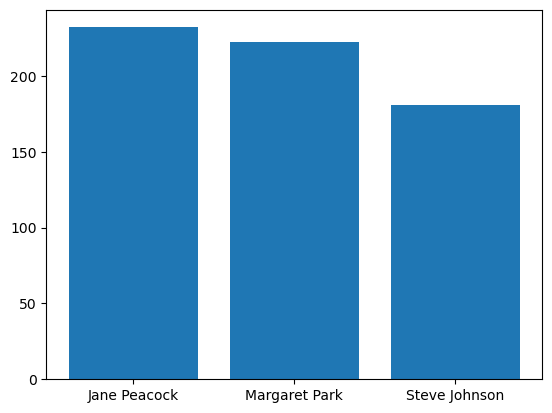

In [39]:
#plt.bar(customerRepData['Total_Album_Sales'], customerRepData['Total_Quantity_Sold'])
#plt.bar(crd_Genre_Total_Quantity_Sold['Genre'], crd_Genre_Total_Quantity_Sold['Total_Quantity_Sold'])
plt.bar(crd_Genre_Total_Quantity_Sold['EmployeeName'], crd_Genre_Total_Quantity_Sold['Total_Quantity_Sold'])

C:\Users\Stephen Lucas\AppData\Local\Temp\ipykernel_13980\4227745565.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crd = customerRepData.groupby(['Genre','EmployeeName'])['Total_Album_Sales','Total_Quantity_Sold'].sum().reset_index()


<Axes: xlabel='Total_Quantity_Sold', ylabel='Total_Album_Sales'>

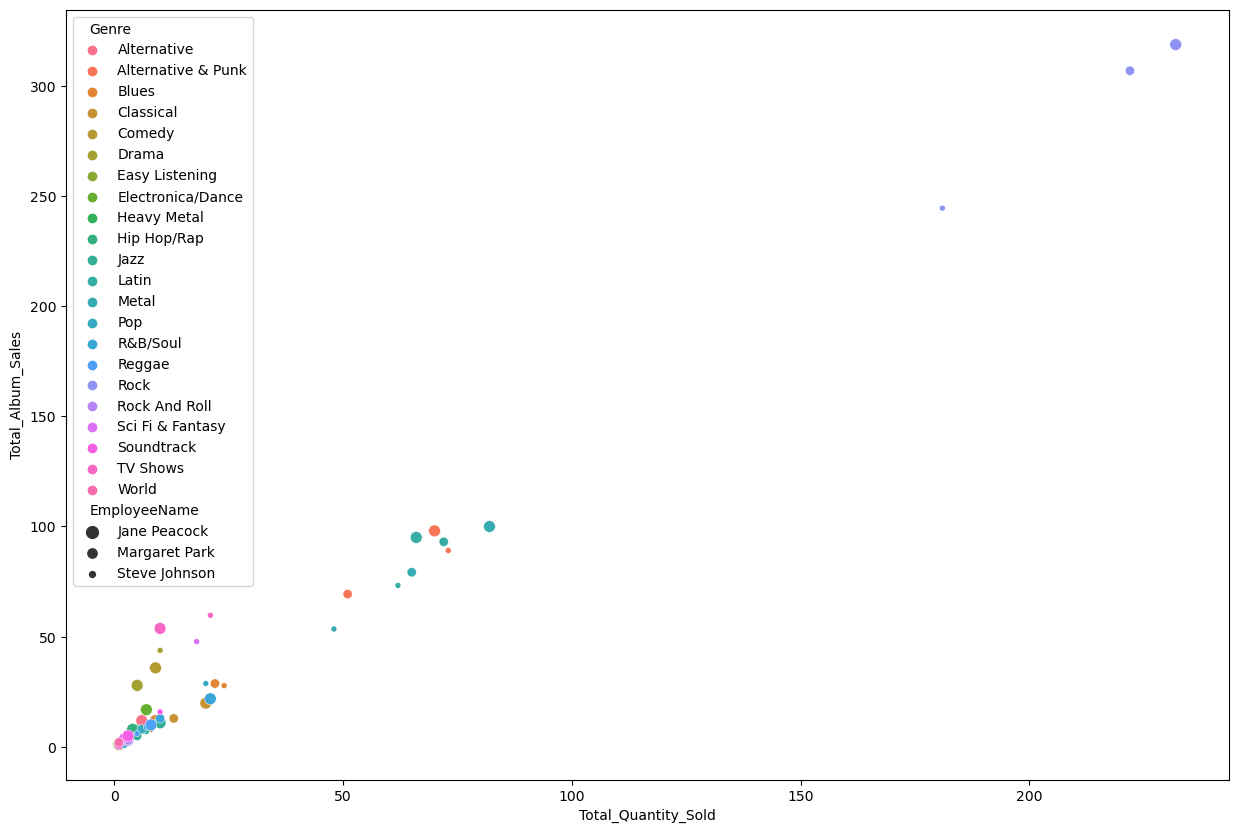

In [49]:
#plt.scatter(customerRepData['Total_Album_Sales'], customerRepData['Total_Quantity_Sold'], hue =customerRepData['Genre'])
plt.figure(figsize=(15,10))
crd = customerRepData.groupby(['Genre','EmployeeName'])['Total_Album_Sales','Total_Quantity_Sold'].sum().reset_index()
#sns.scatterplot(data = customerRepData, y = 'Total_Album_Sales', x = 'Total_Quantity_Sold', hue = 'Genre', size = 'UnitPrice')
sns.scatterplot(data = crd, y = 'Total_Album_Sales', x = 'Total_Quantity_Sold', hue = 'Genre', size='EmployeeName')

<Axes: xlabel='Invoice_year', ylabel='Total_Quantity_Sold'>

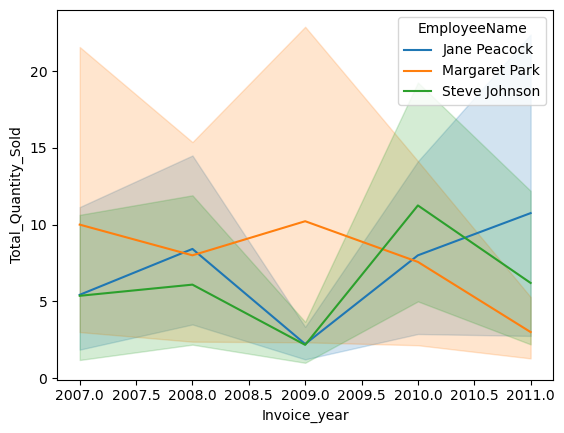

In [8]:
customerRepData['Invoice_date'] = pd.to_datetime(customerRepData2['InvoiceDate'])
customerRepData['Invoice_month_yr'] = customerRepData['Invoice_date'].dt.to_period('M')
customerRepData['Invoice_month'] = customerRepData['Invoice_date'].dt.month
customerRepData['Invoice_year'] = customerRepData['Invoice_date'].dt.year
crd_yr = customerRepData.groupby(['Invoice_year','Genre','EmployeeName'])['Total_Quantity_Sold'].sum().reset_index()

#plt.plot(crd_yr['Invoice_year'], crd_yr['Total_Quantity_Sold'])
sns.lineplot(data = crd_yr,x='Invoice_year',y='Total_Quantity_Sold',hue='EmployeeName')

<Axes: xlabel='Invoice_year', ylabel='Total_Quantity_Sold'>

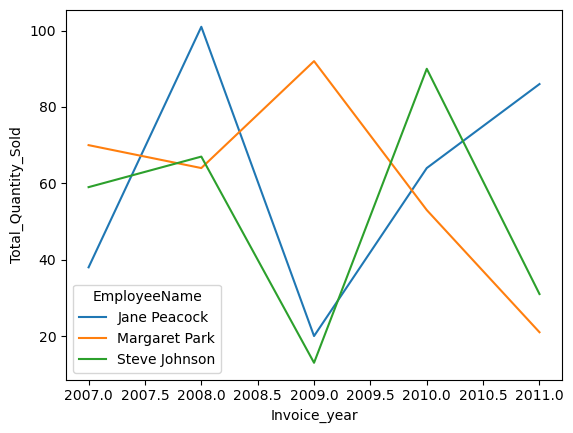

In [9]:
crd_yr = customerRepData.groupby(['Invoice_year','EmployeeName'])['Total_Quantity_Sold'].sum().reset_index()

#plt.plot(crd_yr['Invoice_year'], crd_yr['Total_Quantity_Sold'])
sns.lineplot(data = crd_yr,x='Invoice_year',y='Total_Quantity_Sold',hue='EmployeeName')